OD可視化（ODペアごとの頻度と所要時間分布）

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import seaborn as sns

具体的な経路は観測モデル回せばできる．この集計はより簡単なOD（というよりは全体的な滞在時間分布とか傾向把握のため）

d        1    2    3    4    5     6    7    15    16   17   18   19   20  \
o                                                                           
1        0    0    1    0    0    10  128   287   227  244  100   26  101   
2        2    0    2    0    0     3   21   250   290   59   48    9   34   
3        5    4    5    3    1     4   42   114    83  194  116    6   78   
4        6    9    7    6    5     6  128   169   131  136   95   39  183   
5       14    8    0    5    2     7   31    85    61   24   29    6  103   
6        6    6    2    2    4    12   33    33    19   21    9    8  102   
7       32   16   23   14   20    78    2     6     6    4    4    6    5   
15      41   31   18    5    4     6    5     8     7    4    4    2   12   
16     214  219   95   17   13    17    6     7     7    1    1    3    9   
17     218  144  134   32    8    15    2     6     0    4    6    1    0   
18     210   81  101   62   15    32    7     7     4   13    6    4    3   

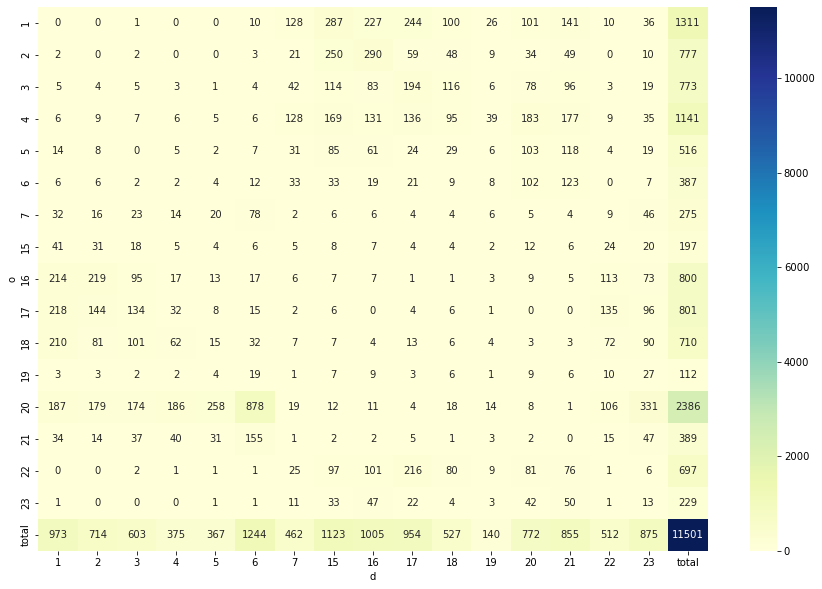

In [6]:
read_folder = '/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/20230130_08/20230130_0845_20sec_forvisualization'
# read_folder = '/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/20230130_17/20230130_1745_18sec_forvisualization'

file_list = list(os.listdir(read_folder))

od = []
od_its = []

for file_name in file_list:
    file_path = os.path.join(read_folder, file_name)
    df = pd.read_csv(file_path)

    first_ble = df.loc[0, 'ID']

    #timestepでgrouping
    grouped = df.groupby('timestep')
    df_list = [group.reset_index(drop=True) for name, group in grouped]

    # 最初と最後でともにhomeあるいは改札で観測された場合
    ts1 = df_list[0]
    tslast = df_list[-1]
    ts1_ble = ts1['ID'].unique()
    tslast_ble = tslast['ID'].unique()

    # 最後のtimestepで最も観測頻度が大きかったビーコンでdを決める
    most_common_did = tslast['ID'].mode()[0]

    last_ble = most_common_did  # df.iloc[-1]['ID']
    
    its = df['timestep'].nunique()

    tuple = (first_ble, last_ble) # 出現回数ならこっち
    tuple_its = (first_ble, last_ble, its) # 平均所要timestepならこっち

    od.append(tuple)
    od_its.append(tuple_its)

od_df = pd.DataFrame(od, columns=['o', 'd'])
od_its_df = pd.DataFrame(od_its, columns=['o', 'd', 'its_count']) 

od_df = od_df.fillna(0)
od_its_df = od_its_df.fillna(0)

cross_table_its = od_its_df.groupby(['o', 'd'])['its_count'].mean().unstack()
cross_table = pd.crosstab(od_df['o'], od_df['d'], margins=True, margins_name='total')
#print(cross_table)
print(cross_table)

plt.figure(figsize=(15, 10))  # 図のサイズを大きくする

sns.heatmap(cross_table, annot=True, fmt="d", cmap="YlGnBu") # annotでセル内表示の有無を決めれる
# fmt="d"では小数点付き数字は表現できないので.1fにする
plt.show()

d        1    2    3    4    5     6    7   15   16   17   18   19    20   21  \
o                                                                               
1        1    2    2    1   10    26  122  142  146  142  127   64   188  124   
2        3    1    1    0    3     6   17  125  236   42   44   15    94   57   
3        3    4    3    1    1     7   42   33   43  136   98   24   171   82   
4        4    8    7    4    1    15   83   70   58  107  123   42   270  201   
5        7    3    5    0   10     5   50   52   29   29   54   26   193  126   
6       13    7    4    0    1    15   50   33   13   15   25   17   265  165   
7       37   18   18   28   35   215    1    7    1    2    6   13    20   10   
15     172  137   23   13   11    32    2    8    2    4    5    1     6    2   
16     289  268   44   21   18    40   10    5    7    1    7    2     3    4   
17     158   94  163   65   20    41    0    3    0    4    7    1     0    0   
18     111   77  155   59   

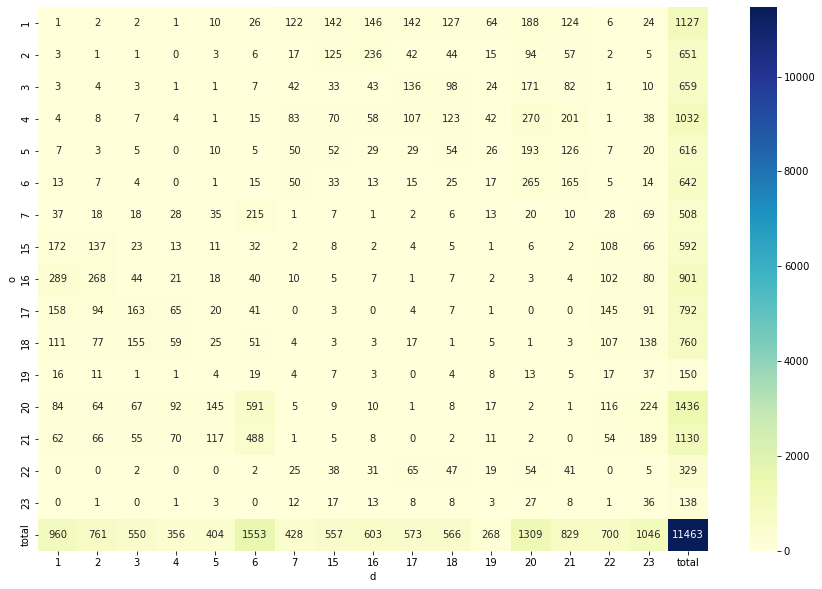

In [7]:
# read_folder = '/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/20230130_08/20230130_0845_20sec_forvisualization'
read_folder = '/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/20230130_17/20230130_1745_18sec_forvisualization'

file_list = list(os.listdir(read_folder))

od = []
od_its = []

for file_name in file_list:
    file_path = os.path.join(read_folder, file_name)
    df = pd.read_csv(file_path)

    first_ble = df.loc[0, 'ID']

    #timestepでgrouping
    grouped = df.groupby('timestep')
    df_list = [group.reset_index(drop=True) for name, group in grouped]

    # 最初と最後でともにhomeあるいは改札で観測された場合
    ts1 = df_list[0]
    tslast = df_list[-1]
    ts1_ble = ts1['ID'].unique()
    tslast_ble = tslast['ID'].unique()

    # 最後のtimestepで最も観測頻度が大きかったビーコンでdを決める
    most_common_did = tslast['ID'].mode()[0]

    last_ble = most_common_did  # df.iloc[-1]['ID']
    
    its = df['timestep'].nunique()

    tuple = (first_ble, last_ble) # 出現回数ならこっち
    tuple_its = (first_ble, last_ble, its) # 平均所要timestepならこっち

    od.append(tuple)
    od_its.append(tuple_its)

od_df = pd.DataFrame(od, columns=['o', 'd'])
od_its_df = pd.DataFrame(od_its, columns=['o', 'd', 'its_count']) 

od_df = od_df.fillna(0)
od_its_df = od_its_df.fillna(0)

cross_table_its = od_its_df.groupby(['o', 'd'])['its_count'].mean().unstack()
cross_table = pd.crosstab(od_df['o'], od_df['d'], margins=True, margins_name='total')
#print(cross_table)
print(cross_table)

plt.figure(figsize=(15, 10))  # 図のサイズを大きくする

sns.heatmap(cross_table, annot=True, fmt="d", cmap="YlGnBu") # annotでセル内表示の有無を決めれる
# fmt="d"では小数点付き数字は表現できないので.1fにする
plt.show()